In [12]:
def randvar_pdf(data,numbins):
    freq , bin_edges = np.histogram(data, bins=numbins)        # Gera o histograma -> dependência do Nunpy
    bins             = bin_edges[:-1]                          # Remove o último valor de borda do bin
    binwidth         = (data.max() - data.min())/(numbins - 1) # Largura dos bins
    freq             = freq/(data.size*binwidth)               # Normalizando os dados
    area             = binwidth*sum(freq)                      # Calculando a área do histograma...
                                                               # ... deve ser ~1 pois foi normalizado
    return bins, freq, area

In [13]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
#from sklearn.neighbors import KernelDensity
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# Gerando os dados aleatórios utilizando uma distribuição beta
a  = 2
b  = 5
Ns = 1000
X     = np.random.beta(a,b,Ns)
# Escolhendo o número de bins a partir do método da raiz quadrada
Nbins = round(m.sqrt(Ns))
Nksd  = round(0.1*Ns)

# Gerando os dados do histograma da PDF
X_bins, X_freq, X_area , = randvar_pdf(X , Nbins)

# Estimando a PDF
X_binwidth = X_bins[0] - X_bins[1]
X_supp1 = np.linspace(X.min(), X.max(), Ns)
X_kde   = stats.gaussian_kde(X)
X_ksd   = X_kde(X_supp1)
#X_kde  = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
#X_ksd  = np.exp(X_kde.score_samples(X_supp1))
# Outra opção seria usar o scipy.stats.guassian_kde(), que faz a estimativa usando um nucleo gaussiano.
# A função ksdensity() do Matlab usa uma distribuição normal, por padrão.
# A vantagem da sklearn.neighbors.KernelDensity é que o núcleo pode ser outro.
# Ver: https://stackoverflow.com/a/28573811/11380901
#      https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity
#      https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

##################################################
# Estimando a CDF
##################################################
X_cdf = ECDF(X)

(0.0, 1.0)

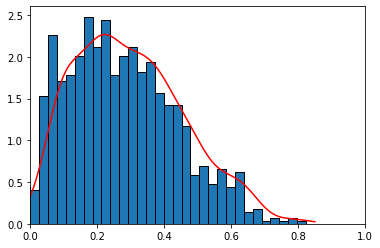

In [15]:
plt.bar(X_bins , X_freq , X_binwidth , align='edge', edgecolor='k')
plt.plot(X_supp1 , X_ksd , 'r')
plt.xlim(0 , 1)

(0.0, 1.0)

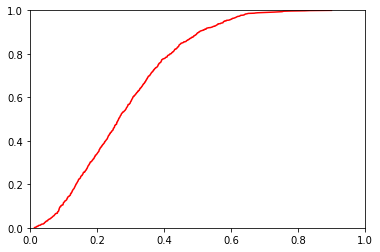

In [14]:
plt.plot(X_cdf.x , X_cdf.y , 'r')
plt.xlim(0 , 1)
plt.ylim(0 , 1)